In [7]:
pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 17.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: packaging━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/31 [tenacity]
    Found existing installation: packaging 25.0━━━━━━━━━━━━━━━  4/31 [tenacity]
    Uninstalling packaging-25.0:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/31 [tenacity]
      Successfully uninstalled packaging-25.0━━━━━━━━━━━━━━━━━  4/31 [tenacity]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31/31 [langgraph]31 [langgraph-checkpoint]
Note: you may need to restart the kernel to use updated packages.


In [8]:
from typing import Dict, TypedDict
import decimal
from langgraph.graph import StateGraph

In [29]:
class AgentState(TypedDict):
    message : str
    balance : decimal

In [30]:
def bank_teller_node(state:AgentState) -> AgentState:
    """A node to dispaly the user's current bank balance"""
    state["message"] = "Your current balance is: £" + str(state["balance"]) + "."
    return state

In [31]:
graph = StateGraph(AgentState)
graph.add_node("bank_teller", bank_teller_node)
graph.set_entry_point("bank_teller")
graph.set_finish_point("bank_teller")
app = graph.compile()

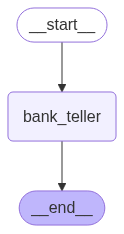

In [24]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
result = app.invoke({"balance":2500})

result["message"]

'Your current balance is: £2500.'